In [23]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans


In [24]:
df = pd.read_csv(r'C:\Users\STEVEN\Documents\Thinkful\BM_2014_results.csv')

In [25]:
df.shape

(31984, 21)

In [26]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [27]:
df.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [28]:
df.head(10)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,...,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,...,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,...,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,...,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,...,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


In [29]:
def cat_to_num(x):
    if x=='M':
        return 0
    if x=='F':
        return 1
df['cat_sex'] = df.gender.apply(cat_to_num)
#print(df.cat_sex)


In [30]:
df[['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half']]  = df[['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half']].apply(pd.to_numeric, errors='coerce')
print(df.dtypes)
df = df.fillna(0)
#what do I want to do with NANs

10k          float64
name          object
division       int64
25k          float64
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k          float64
overall        int64
pace         float64
state         object
30k          float64
5k           float64
half         float64
20k          float64
country       object
city          object
40k          float64
cat_sex        int64
dtype: object


In [31]:
X = df[['age', 'overall', 'pace','cat_sex', '10k', '20k', '25k', '30k', '35k', '40k', 'half']]
y  = df['official']

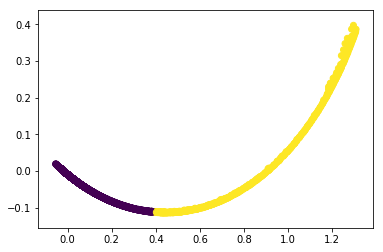

Comparing k-means clusters against the data:
official  80.60   81.23   84.65   84.70   84.82   84.88   85.25   85.38   \
row_0                                                                      
0              0       0       0       0       0       0       0       0   
1              1       2       1       1       1       1       1       1   

official  86.90   86.95    ...    448.92  451.63  455.65  457.55  461.87  \
row_0                      ...                                             
0              0       0   ...         1       1       1       1       1   
1              1       2   ...         0       0       0       0       0   

official  472.57  473.17  479.80  534.22  538.88  
row_0                                             
0              1       1       1       1       1  
1              0       0       0       0       0  

[2 rows x 11030 columns]


In [32]:
pca=PCA(n_components=2)

X_norm = normalize(X)

X_pca = pca.fit_transform(X_norm)

y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

It appears as though the data set is dividing along sex lines and that is how the cluster is trying to exist. 


In [33]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_pca, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_pca)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 17


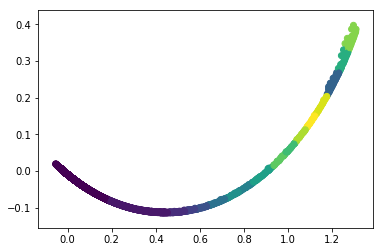

Comparing the assigned categories to the ones in the data:
col_0     0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
official                                                                    
80.60      0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
81.23      0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0
84.65      0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
84.70      0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
84.82      0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
84.88      0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
85.25      0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
85.38      0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
86.90      0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
86.95      0   0   0   0   0   0   0   0   0   0   1   0   0   1   0   0   0
87.40      0   0 

In [34]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y,labels))

Here we can see the module estimating the creation of 17 different cells using only 2 identifiers

In [35]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_norm, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_norm)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 27


Here we can see that the estimators now predict 27 different clusters based on the data present.  

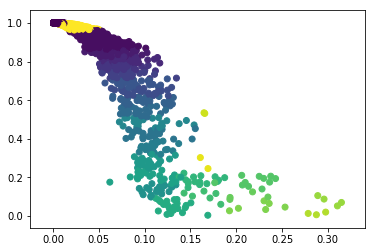

Comparing the assigned categories to the ones in the data:
col_0     0   1   2   3   4   5   6   7   8   9  ...  17  18  19  20  21  22  \
official                                         ...                           
80.60      0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   
81.23      0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   
84.65      0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   1   0   
84.70      0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   1   0   
84.82      0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   1   0   
84.88      0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   1   0   
85.25      0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   1   
85.38      0   0   0   0   0   0   0   0   0   0 ...   0   1   0   0   0   0   
86.90      0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   1   0   
86.95      0   0   0   0   0   0   0   0   0   0 ...   0   0 

In [36]:
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y,labels))

In [ ]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

C:\Users\STEVEN\Anaconda3\lib\site-packages\sklearn\cluster\mean_shift_.py:282: UserWarning: Binning data failed with provided bin_size=0.040354, using data points as seeds.
  " using data points as seeds." % bin_size)


Number of estimated clusters: 31984


In [ ]:
y_pred = KMeans(n_clusters=10, random_state=42).fit_predict(X_norm)

plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

Looking at the new read out it appears that there were significant grouping at the different timings.  

In [ ]:
#Breaks my computer

from sklearn.cluster import SpectralClustering

n_clusters=2
sc = SpectralClustering(n_clusters=2)
sc.fit(X_pca)

y_pred = sc.fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))


In [ ]:
#Affinity also breaks my computer